# Classification and Regression

## binary classification example: IMDB dataset

In [12]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [13]:
train_data.shape

(25000,)

In [14]:
train_labels[0]

np.int64(1)

In [19]:
for sequence in train_data[:2]:
    print(sequence)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 1

In [20]:
max([max(sequence) for sequence in train_data])

9999

### Decoding reviews back to text

In [21]:
# 숫자를 글자로 디코딩
# word_index에는 단어:숫자 형태로 딕셔너리 매핑
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[2]])

# word_index에서 인덱스의 0,1,2는 특수토큰에 사용됨
# 딕셔너리에 없는 단어일 경우 ? 반환

In [22]:
list(word_index.items())[:10]

[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951),
 ('woods', 1408),
 ('spiders', 16115),
 ('hanging', 2345),
 ('woody', 2289),
 ('trawling', 52008)]

In [23]:
decoded_review

"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

## preparing the data

### encoding the integer sequences via multi-hot encoding

In [25]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

In [26]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [28]:
x_train.shape

(25000, 10000)

In [29]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [30]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building model

In [46]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [47]:
model.compile(optimizer = keras.optimizers.RMSprop(),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

## validating your approach

In [48]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [49]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 10,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.6914 - loss: 0.6168 - val_accuracy: 0.8514 - val_loss: 0.4379
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8832 - loss: 0.3844 - val_accuracy: 0.8715 - val_loss: 0.3472
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9125 - loss: 0.2774 - val_accuracy: 0.8855 - val_loss: 0.2983
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9308 - loss: 0.2201 - val_accuracy: 0.8874 - val_loss: 0.2784
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9424 - loss: 0.1828 - val_accuracy: 0.8877 - val_loss: 0.2757
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9515 - loss: 0.1538 - val_accuracy: 0.8872 - val_loss: 0.2780
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9594 - loss: 0.1360 - val_accuracy: 0.8791 - val_loss: 0.3048
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9616 - loss: 0.1233 - val_accuracy: 0.8836 - v

In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

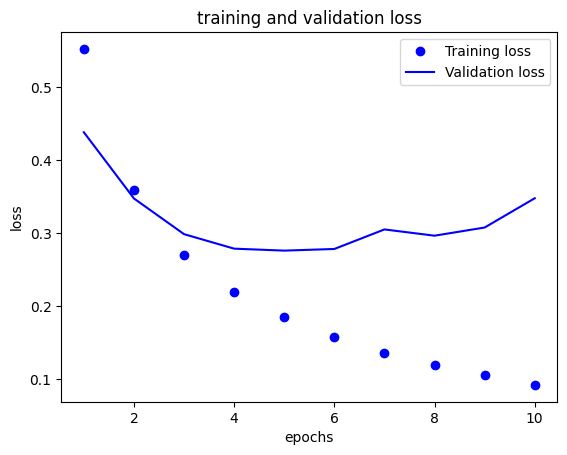

In [50]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

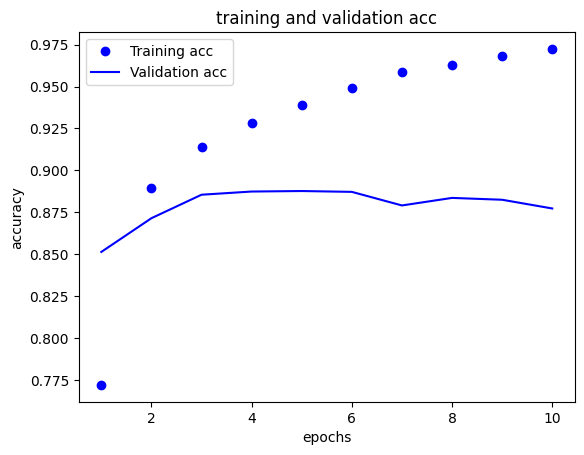

In [51]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation acc')
plt.title('training and validation acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [53]:
model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7340 - loss: 0.5671
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9015 - loss: 0.2934
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9250 - loss: 0.2189
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9364 - loss: 0.1817
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8809 - loss: 0.2931


In [54]:
results

[0.29305940866470337, 0.8822799921035767]

In [55]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.1998916 ],
       [0.999718  ],
       [0.70870703],
       ...,
       [0.0784843 ],
       [0.06753938],
       [0.45422632]], dtype=float32)

## A multiclass classification example

### Reuters dataset

In [60]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [61]:
len(train_data)

8982

In [62]:
len(test_data)

2246

In [63]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [64]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [65]:
train_labels[10]

np.int64(3)

In [66]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [67]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [68]:
train_labels[:3]

array([3, 4, 3])

In [69]:
y_train[:3]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [70]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building Model

In [71]:
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

In [72]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### validation set

In [75]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [76]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.3228 - loss: 3.5025 - val_accuracy: 0.5340 - val_loss: 2.4816
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5727 - loss: 2.1574 - val_accuracy: 0.6590 - val_loss: 1.6255
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6940 - loss: 1.4635 - val_accuracy: 0.7130 - val_loss: 1.3002
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7663 - loss: 1.0703 - val_accuracy: 0.7540 - val_loss: 1.1388
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8177 - loss: 0.8464 - val_accuracy: 0.7730 - val_loss: 1.0301
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8656 - loss: 0.6561 - val_accuracy: 0.8070 - val_loss: 0.9564
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8970 - loss: 0.5010 - val_accuracy: 0.8100 - val_loss: 0.9067
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9203 - loss: 0.3974 - val_accuracy: 0.8220 - 

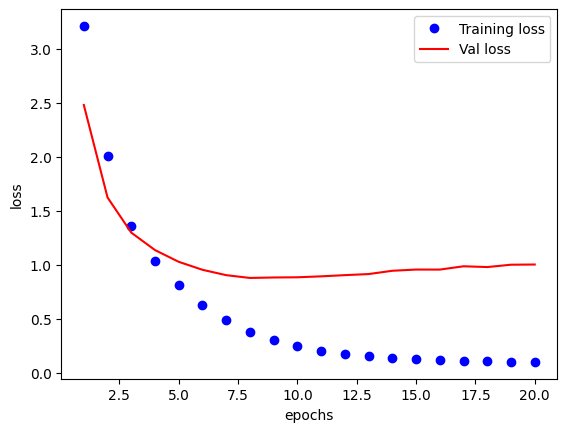

In [79]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

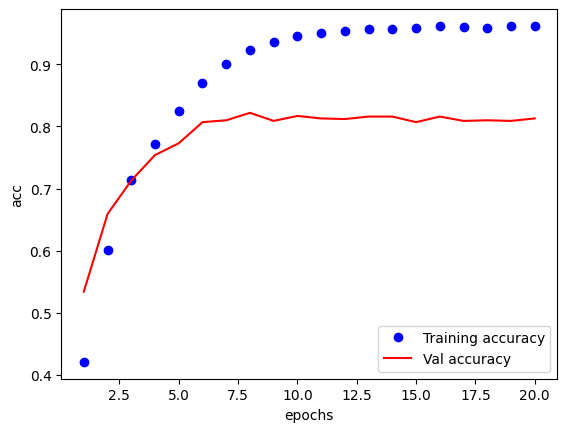

In [81]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Val accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [87]:
model = keras.Sequential([
    layers.Dense(512, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(56, activation = 'relu'),
    layers.Dense(56, activation = 'relu'),
    layers.Dense(46, activation = 'softmax'),
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train,
          partial_y_train,
          epochs = 100,
          batch_size = 512,
          validation_data = (x_val, y_val))

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.2143 - loss: 3.5745 - val_accuracy: 0.4840 - val_loss: 2.1735
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4930 - loss: 2.0730 - val_accuracy: 0.5420 - val_loss: 1.7938
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5459 - loss: 1.7126 - val_accuracy: 0.5880 - val_loss: 1.6160
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6209 - loss: 1.3912 - val_accuracy: 0.6170 - val_loss: 1.5387
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6502 - loss: 1.1965 - val_accuracy: 0.6180 - val_loss: 1.5304
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6902 - loss: 1.0270 - val_accuracy: 0.6710 - val_loss: 1.6289
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7615 - loss: 0.8289 - val_accuracy: 0.6940 - val_loss: 1.6322
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7876 - loss: 0.7344 - val_accuracy: 0

In [92]:
model2 = keras.Sequential([
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(56, activation = 'relu'),
    layers.Dense(56, activation = 'relu'),
    layers.Dense(46, activation = 'softmax'),
])

model2.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history2 = model2.fit(partial_x_train,
          partial_y_train,
          epochs = 100,
          batch_size = 512,
          validation_data = (x_val, y_val))

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 311ms/step - accuracy: 0.1961 - loss: 3.5991 - val_accuracy: 0.3540 - val_loss: 2.1789
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3398 - loss: 2.2117 - val_accuracy: 0.4820 - val_loss: 1.8970
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4855 - loss: 1.8024 - val_accuracy: 0.5430 - val_loss: 1.6814
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5447 - loss: 1.5895 - val_accuracy: 0.5740 - val_loss: 1.6077
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5745 - loss: 1.4638 - val_accuracy: 0.5950 - val_loss: 1.5184
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6114 - loss: 1.2829 - val_accuracy: 0.6410 - val_loss: 1.4657
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6465 - loss: 1.1879 - val_accuracy: 0.6700 - val_loss: 1.4461
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6838 - loss: 1.0799 - val_accuracy: 

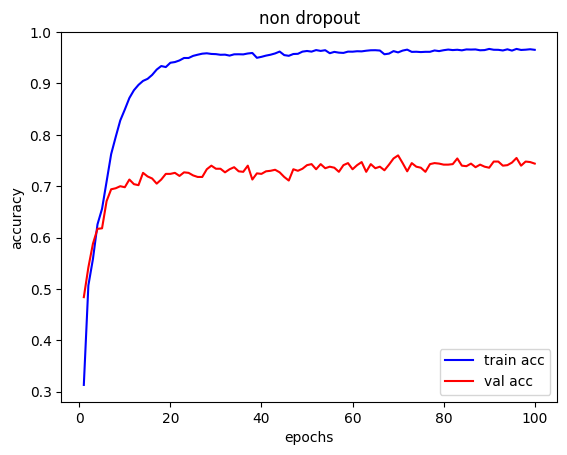

In [89]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,101)

plt.plot(epochs, train_acc, 'b', label = 'train acc')
plt.plot(epochs, val_acc, 'r', label = 'val acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('non dropout')
plt.show()

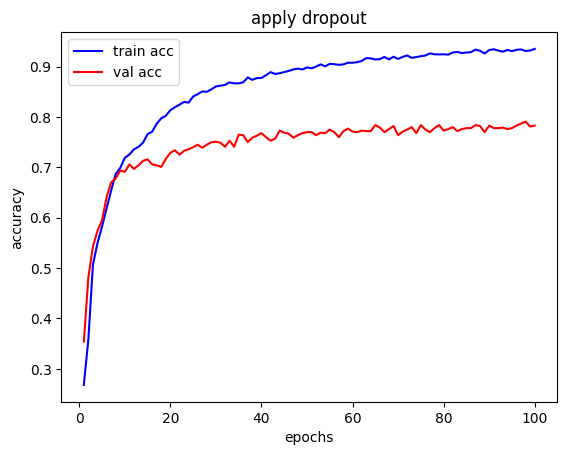

In [94]:
train_acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
epochs = range(1,101)

plt.plot(epochs, train_acc, 'b', label = 'train acc')
plt.plot(epochs, val_acc, 'r', label = 'val acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('apply dropout')
plt.show()

In [102]:
results1 = model.evaluate(x_test, y_test)
results1

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7454 - loss: 3.8058


[4.114328861236572, 0.7346393465995789]

In [105]:
results2 = model2.evaluate(x_test, y_test)
results2

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7651 - loss: 3.2465


[3.5403199195861816, 0.7551202178001404]

In [106]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [109]:
predictions[0].shape

(46,)

In [110]:
print(np.sum(predictions[0]))

1.0


In [111]:
print(np.argmax(predictions[0]))

3


### A different way to handle the labels and the loss

In [112]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [114]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy', # 레이블을 원핫인코딩으로 안넣고 사용할 때
              metrics = ['accuracy'])

### Importance of having sufficiently large intermediate layers

In [115]:
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(2, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs = 10,
          batch_size = 128,
          validation_data = (x_val, y_val))

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.0115 - loss: 3.6558 - val_accuracy: 0.0230 - val_loss: 3.0315
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1112 - loss: 2.6624 - val_accuracy: 0.3670 - val_loss: 1.9598
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3874 - loss: 1.8215 - val_accuracy: 0.4090 - val_loss: 1.7755
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4843 - loss: 1.5939 - val_accuracy: 0.5800 - val_loss: 1.6285
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5977 - loss: 1.3933 - val_accuracy: 0.5860 - val_loss: 1.5990
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5992 - loss: 1.3170 - val_accuracy: 0.5890 - val_loss: 1.5745
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6159 - loss: 1.2352 - val_accuracy: 0.5900 - val_loss: 1.5962
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6061 - loss: 1.2322 - val_accuracy: 0.5880 - val_los

## Regression example

### Boston Housing Price dataset

In [117]:
from tensorflow.keras.datasets import boston_housing
import numpy as np
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
from tensorflow import keras
from tensorflow.keras import layers

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [118]:
train_data.shape

(404, 13)

In [119]:
test_data.shape

(102, 13)

In [120]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Normalizing the data

In [121]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std
test_data -= mean
test_data /= std

### Build Model

In [122]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation = 'relu'),
        layers.Dense(32, activation = 'relu'),
        layers.Dense(16, activation = 'relu'),
        layers.Dense(8, activation = 'relu'),
        layers.Dense(1)
    ])

    model.compile(optimizer = 'adam',
                  loss = 'mse',
                  metrics = ['mae'])
    return model

### K-fold validation

In [123]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 10
all_scores = []

for i in range(k):
    print(f'Processing fold {i}')
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis = 0)
    partial_train_target = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1)*num_val_samples:]],
        axis = 0)
    model = build_model()
    model.fit(partial_train_data,
              partial_train_target,
              epochs = num_epochs,
              batch_size = 16,
              verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

Processing fold 0
Processing fold 1
Processing fold 2
Processing fold 3


In [124]:
all_scores

[2.943143367767334, 3.390141487121582, 2.989375114440918, 3.5865976810455322]

In [125]:
np.mean(all_scores)

np.float64(3.2273144125938416)

### saving validation logs at each fold

In [127]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 10
all_mae_his = []

for i in range(k):
    print(f'Processing fold {i}')
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis = 0)
    partial_train_target = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1)*num_val_samples:]],
        axis = 0)
    model = build_model()
    history = model.fit(partial_train_data,
                        partial_train_target,
                        epochs = num_epochs,
                        batch_size = 16,
                        validation_data = (val_data, val_targets),
                        verbose = 0)
    mae_history = history.history['val_mae']
    all_mae_his.append(mae_history)

Processing fold 0
Processing fold 1
Processing fold 2
Processing fold 3


### 연속적인 kfold 검증 스코어의 점수 만들기

In [128]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_his]) for i in range(num_epochs)
]

In [129]:
np.mean([x[0] for x in all_mae_his])

np.float64(21.48615026473999)

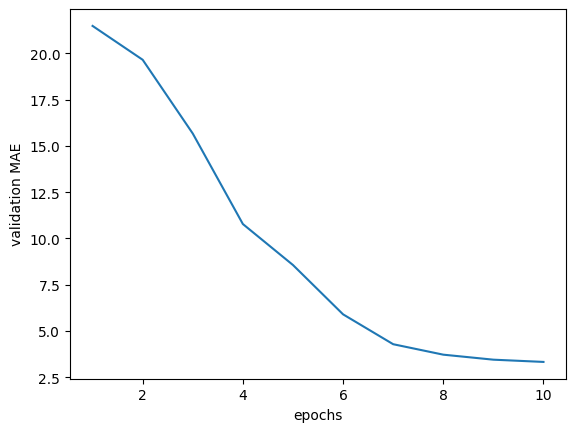

In [133]:
plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('epochs')
plt.ylabel('validation MAE')
plt.show()

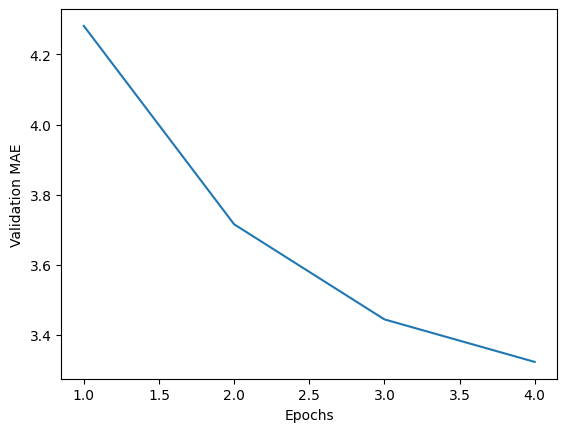

In [136]:
truncated_mae_history = average_mae_history[6:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [138]:
model = build_model()
model.fit(train_data, train_targets,
          epochs = 130, batch_size = 16, verbose = 0
)

test_mse_scores, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 9.5970 - mae: 2.2198


In [139]:
test_mae_score

2.3373939990997314

In [145]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([8.303342], dtype=float32)